In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-aug-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-aug-2022/train.csv
/kaggle/input/tabular-playground-series-aug-2022/test.csv


In [2]:
train = pd.read_csv('../input/tabular-playground-series-aug-2022/train.csv')
train.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [3]:
test = pd.read_csv('../input/tabular-playground-series-aug-2022/test.csv')
test.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [4]:
print(f'train data has {train.shape[0]} rows and {train.shape[1]} columns')
print(f'test data has {test.shape[0]} rows and {test.shape[1]} columns')

train data has 26570 rows and 26 columns
test data has 20775 rows and 25 columns


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20775 entries, 0 to 20774
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20775 non-null  int64  
 1   product_code    20775 non-null  object 
 2   loading         20552 non-null  float64
 3   attribute_0     20775 non-null  object 
 4   attribute_1     20775 non-null  object 
 5   attribute_2     20775 non-null  int64  
 6   attribute_3     20775 non-null  int64  
 7   measurement_0   20775 non-null  int64  
 8   measurement_1   20775 non-null  int64  
 9   measurement_2   20775 non-null  int64  
 10  measurement_3   20446 non-null  float64
 11  measurement_4   20366 non-null  float64
 12  measurement_5   20267 non-null  float64
 13  measurement_6   20151 non-null  float64
 14  measurement_7   20055 non-null  float64
 15  measurement_8   19929 non-null  float64
 16  measurement_9   19871 non-null  float64
 17  measurement_10  19708 non-null 

Observations
- Quite a few features in both train and test data seem to be containing missing values.
- All features except attribute_1, attribute_0 and product_code are numeric

In [7]:
df_train = train.copy()

In [8]:
df_test = test.copy()

# **EDA**

In [9]:
def miss_val(data):
    c = data.isnull().sum()
    p = round(100*data.isnull().sum()/len(data), 2)
    miss_tab_df = pd.concat((c, p), axis = 1).reset_index(drop = False)
    miss_tab_df.rename(columns = {'index' : 'features', 0 : 'count_miss_val', 1 : 'percentage_miss_val'}, inplace = True)
    miss_df = miss_tab_df[miss_tab_df['count_miss_val'] > 0]
    return miss_df

In [10]:
miss_val(train)


,features,count_miss_val,percentage_miss_val
2,loading,250,0.94
10,measurement_3,381,1.43
11,measurement_4,538,2.02
12,measurement_5,676,2.54
13,measurement_6,796,3.00
14,measurement_7,937,3.53
15,measurement_8,1048,3.94
16,measurement_9,1227,4.62
17,measurement_10,1300,4.89
18,measurement_11,1468,5.53


In [11]:
miss_val(test)

,features,count_miss_val,percentage_miss_val
2,loading,223,1.07
10,measurement_3,329,1.58
11,measurement_4,409,1.97
12,measurement_5,508,2.45
13,measurement_6,624,3.00
14,measurement_7,720,3.47
15,measurement_8,846,4.07
16,measurement_9,904,4.35
17,measurement_10,1067,5.14
18,measurement_11,1136,5.47


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

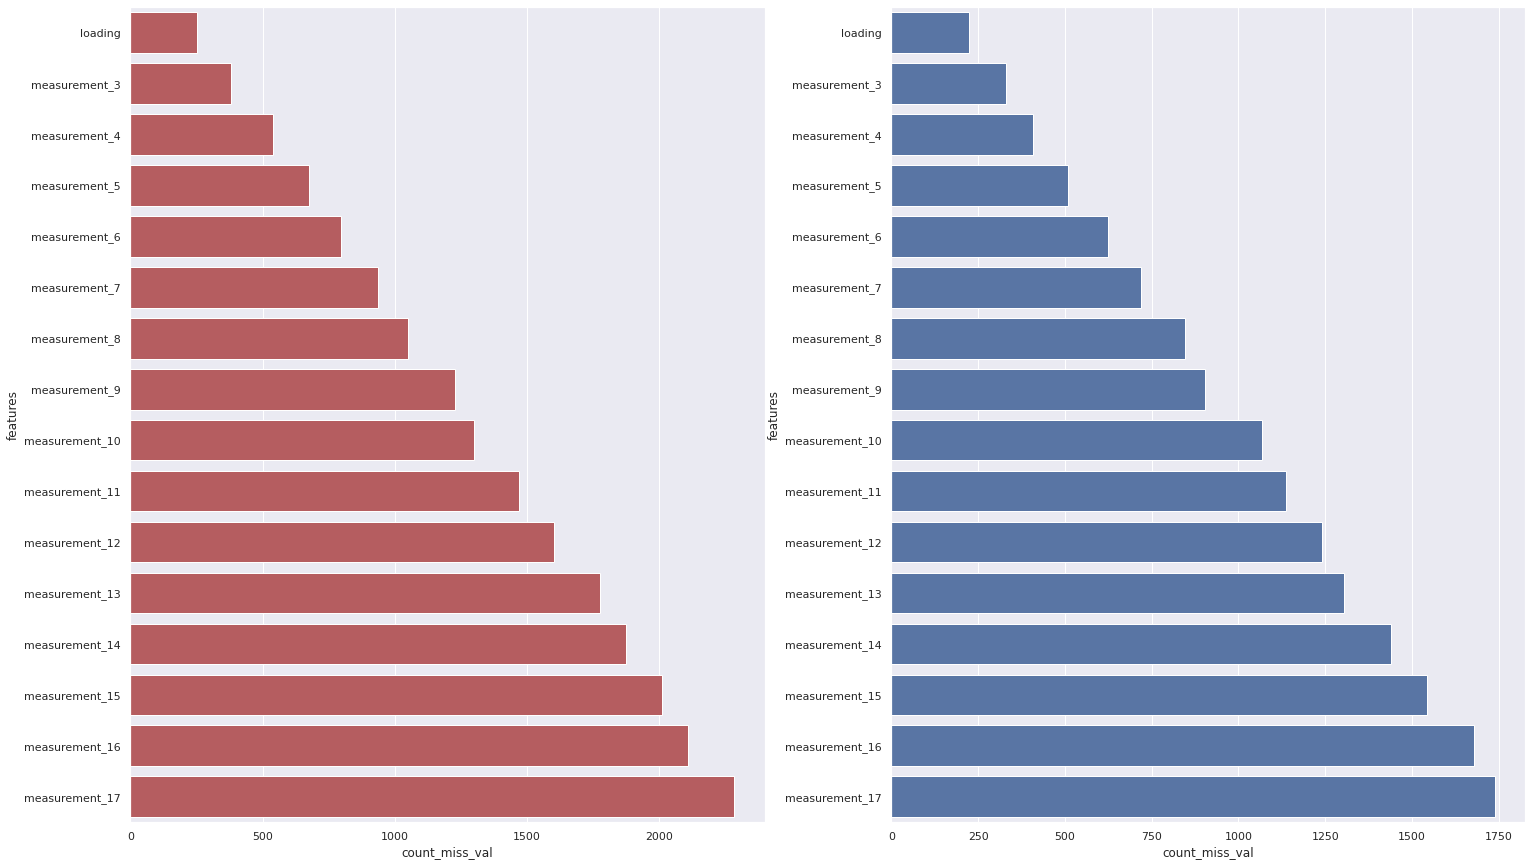

In [13]:
plt.figure(figsize = (25, 15))
plt.subplot(1, 2, 1)
sns.barplot(x = 'count_miss_val', y = 'features', data = miss_val(train), color = 'r')
plt.subplot(1, 2, 2)
sns.barplot(x = 'count_miss_val', y = 'features', data = miss_val(test), color = 'b')
plt.show()

Observations
- The distribution of missing values in features is same for both train and test data.
- All the features containing missing values are numeric.

### Distribution of target variable

0    78.73918
1    21.26082
Name: failure, dtype: float64


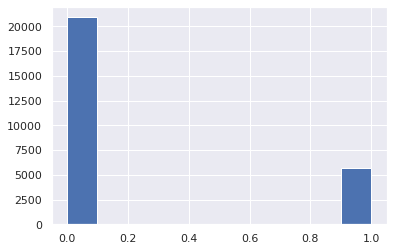

In [14]:
plt.hist(train['failure']);
print(train['failure'].value_counts(normalize = True) * 100)

The target variable is highly imbalanced with almost 79% data belonging to class 0 and only 21% data belonging to class 1

In [15]:
# Checking for duplicate rows
train.duplicated().any()

False

In [16]:
test.duplicated().any()

False

There are no duplicate values

#### **Visualize product feature**

  product_code  freq_product_code
0            C               5765
1            E               5343
2            B               5250
3            D               5112
4            A               5100


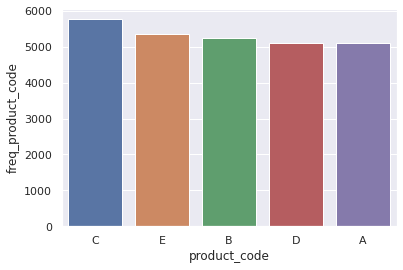

In [17]:
df = (train['product_code'].value_counts()).to_frame()
df_vc = df.reset_index(drop = False)
df_vc.rename(columns = {'index' : 'product_code', 'product_code' : 'freq_product_code'}, inplace = True)
print(df_vc)
sns.barplot(x = 'product_code', y = 'freq_product_code', data = df_vc)
plt.show()

  product_code  freq_product_code
0            F               5422
1            I               5228
2            G               5107
3            H               5018


<AxesSubplot:xlabel='product_code', ylabel='freq_product_code'>

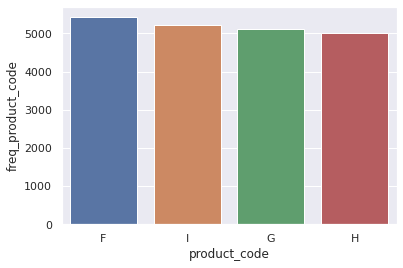

In [18]:
df = (test['product_code'].value_counts()).to_frame()
df_vc_test = df.reset_index(drop = False)
df_vc_test.rename(columns = {'index' : 'product_code', 'product_code' : 'freq_product_code'}, inplace = True)
print(df_vc_test)
sns.barplot(x = 'product_code', y = 'freq_product_code', data = df_vc_test)

There are different categories for product_code in train and test sets

Calculate mean failure rate for each product_code

In [19]:
train.groupby('product_code')['failure'].mean()

product_code
A    0.227255
B    0.200381
C    0.211622
D    0.217527
E    0.207000
Name: failure, dtype: float64

So, mean failure rate is almost same for all product codes.

#### **Visualize integer features**

**Check unique values for integer features**

In [20]:
def int_feat(data): # except id and target feature failure
    features = [c for c in data.columns if data[c].dtype == 'int64' and c not in ['id', 'failure']]
    return features

In [21]:
print(f'Integer features in train data are {int_feat(train)}')
print(f'Integer features in test data are {int_feat(test)}')

Integer features in train data are ['attribute_2', 'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2']
Integer features in test data are ['attribute_2', 'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2']


In [22]:
tr_int_feat = int_feat(train)
for c in tr_int_feat:
    print(c)
    print(train[c].nunique())
    print('-' * 100)

attribute_2
4
----------------------------------------------------------------------------------------------------
attribute_3
4
----------------------------------------------------------------------------------------------------
measurement_0
29
----------------------------------------------------------------------------------------------------
measurement_1
30
----------------------------------------------------------------------------------------------------
measurement_2
25
----------------------------------------------------------------------------------------------------


In [23]:
te_int_feat = int_feat(train)
for c in te_int_feat:
    print(c)
    print(test[c].nunique())
    print('-' * 100)

attribute_2
3
----------------------------------------------------------------------------------------------------
attribute_3
4
----------------------------------------------------------------------------------------------------
measurement_0
30
----------------------------------------------------------------------------------------------------
measurement_1
33
----------------------------------------------------------------------------------------------------
measurement_2
28
----------------------------------------------------------------------------------------------------


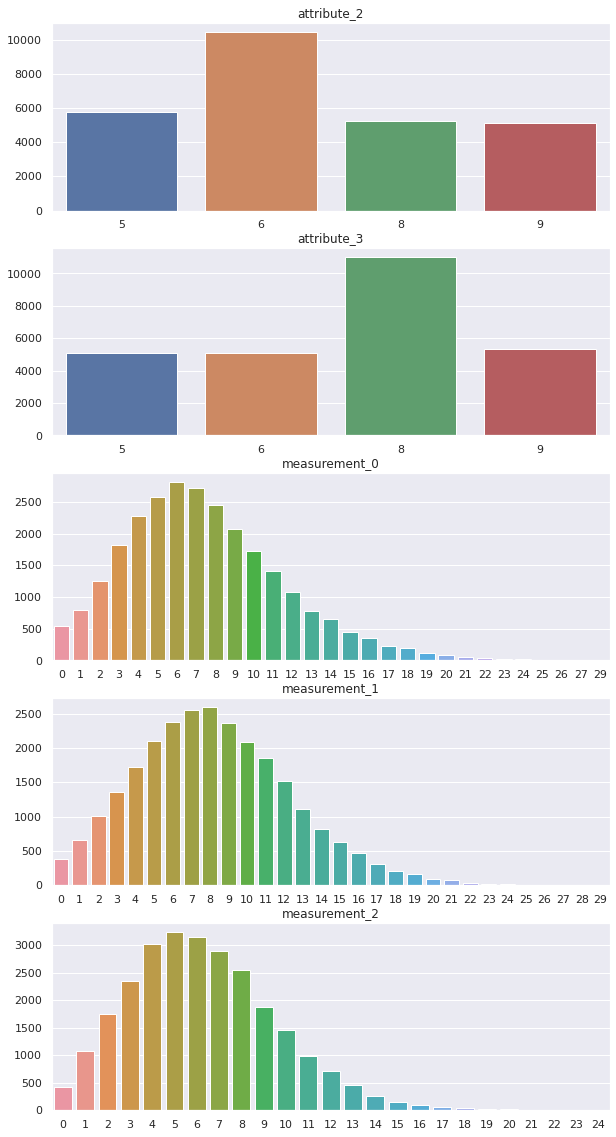

In [24]:
# Plot train integer features
plt.figure(figsize = (10, 20))
train_int_feat = ['attribute_2', 'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2']
plt.subplot(5, 1, 1)
sns.barplot(x = train[train_int_feat[0]].value_counts().index, y = train[train_int_feat[0]].value_counts().values, data = train).set(title=train_int_feat[0])
plt.subplot(5, 1, 2)
sns.barplot(x = train[train_int_feat[1]].value_counts().index, y = train[train_int_feat[1]].value_counts().values, data = train).set(title=train_int_feat[1])
plt.subplot(5, 1, 3)
sns.barplot(x = train[train_int_feat[2]].value_counts().index, y = train[train_int_feat[2]].value_counts().values, data = train).set(title=train_int_feat[2])
plt.subplot(5, 1, 4)
sns.barplot(x = train[train_int_feat[3]].value_counts().index, y = train[train_int_feat[3]].value_counts().values, data = train).set(title=train_int_feat[3])
plt.subplot(5, 1, 5)
sns.barplot(x = train[train_int_feat[4]].value_counts().index, y = train[train_int_feat[4]].value_counts().values, data = train).set(title=train_int_feat[4])
plt.show()

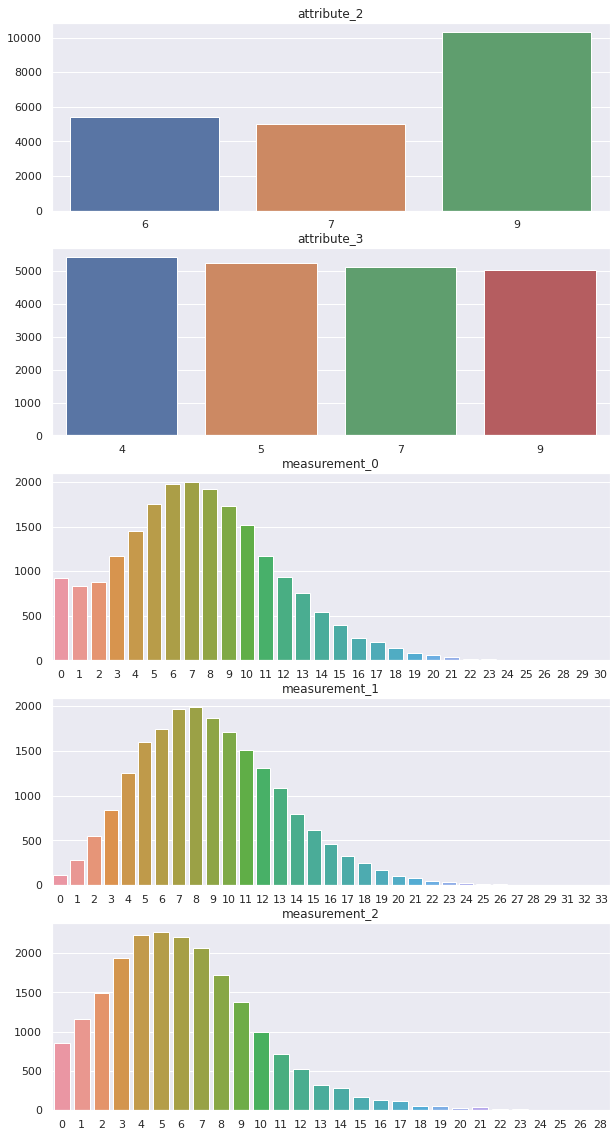

In [25]:
# Plot train integer features
plt.figure(figsize = (10, 20))
test_int_feat = ['attribute_2', 'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2']
plt.subplot(5, 1, 1)
sns.barplot(x = test[test_int_feat[0]].value_counts().index, y = test[test_int_feat[0]].value_counts().values, data = test).set(title=test_int_feat[0])
plt.subplot(5, 1, 2)
sns.barplot(x = test[test_int_feat[1]].value_counts().index, y = test[test_int_feat[1]].value_counts().values, data = test).set(title=test_int_feat[1])
plt.subplot(5, 1, 3)
sns.barplot(x = test[test_int_feat[2]].value_counts().index, y = test[test_int_feat[2]].value_counts().values, data = test).set(title=test_int_feat[2])
plt.subplot(5, 1, 4)
sns.barplot(x = test[test_int_feat[3]].value_counts().index, y = test[test_int_feat[3]].value_counts().values, data = test).set(title=test_int_feat[3])
plt.subplot(5, 1, 5)
sns.barplot(x = test[test_int_feat[4]].value_counts().index, y = test[test_int_feat[4]].value_counts().values, data = test).set(title=test_int_feat[4])
plt.show()

Observations
- 

### Product_code and attributes

In [26]:
attrib_feat = [c for c in train.columns if c.startswith('attribute')] # features starting with attribute
for i in range(len(attrib_feat)):
    print(attrib_feat[i].upper())
    print('*' * 100)
    print(pd.crosstab(train['product_code'], train[attrib_feat[i]]))
    print('-' * 100)

ATTRIBUTE_0
****************************************************************************************************
attribute_0   material_5  material_7
product_code                        
A                      0        5100
B                   5250           0
C                      0        5765
D                      0        5112
E                      0        5343
----------------------------------------------------------------------------------------------------
ATTRIBUTE_1
****************************************************************************************************
attribute_1   material_5  material_6  material_8
product_code                                    
A                      0           0        5100
B                   5250           0           0
C                      0           0        5765
D                   5112           0           0
E                      0        5343           0
-----------------------------------------------------------------------

In [27]:
attrib_feat = [c for c in test.columns if c.startswith('attribute')] # features starting with attribute
for i in range(len(attrib_feat)):
    print(attrib_feat[i].upper())
    print('*' * 100)
    print(pd.crosstab(test['product_code'], test[attrib_feat[i]]))
    print('-' * 100)

ATTRIBUTE_0
****************************************************************************************************
attribute_0   material_5  material_7
product_code                        
F                   5422           0
G                   5107           0
H                      0        5018
I                      0        5228
----------------------------------------------------------------------------------------------------
ATTRIBUTE_1
****************************************************************************************************
attribute_1   material_5  material_6  material_7
product_code                                    
F                      0        5422           0
G                      0        5107           0
H                      0           0        5018
I                   5228           0           0
----------------------------------------------------------------------------------------------------
ATTRIBUTE_2
********************************************

**product_code in both train and test data belong to particular attributes among attribute_0, attribute_1, atribute_2 and attribute_3, thus the attributes are completely determined by product_code.**

**determining mean failure rates for each attribute

In [28]:
print(train.groupby(['attribute_0'])['failure'].mean())
print(train.groupby(['attribute_1'])['failure'].mean())
print(train.groupby(['attribute_2'])['failure'].mean())
print(train.groupby(['attribute_3'])['failure'].mean())

attribute_0
material_5    0.200381
material_7    0.215619
Name: failure, dtype: float64
attribute_1
material_5    0.20884
material_6    0.20700
material_8    0.21896
Name: failure, dtype: float64
attribute_2
5    0.211622
6    0.212147
8    0.200381
9    0.227255
Name: failure, dtype: float64
attribute_3
5    0.227255
6    0.217527
8    0.206264
9    0.207000
Name: failure, dtype: float64


Mean failure rate for different attributes are almost same.

#### **Visualizing float features**

In [29]:
train_float_feat = [c for c in train.columns if train[c].dtype == 'float64']
print(f'There are {len(train_float_feat)} float features')

There are 16 float features


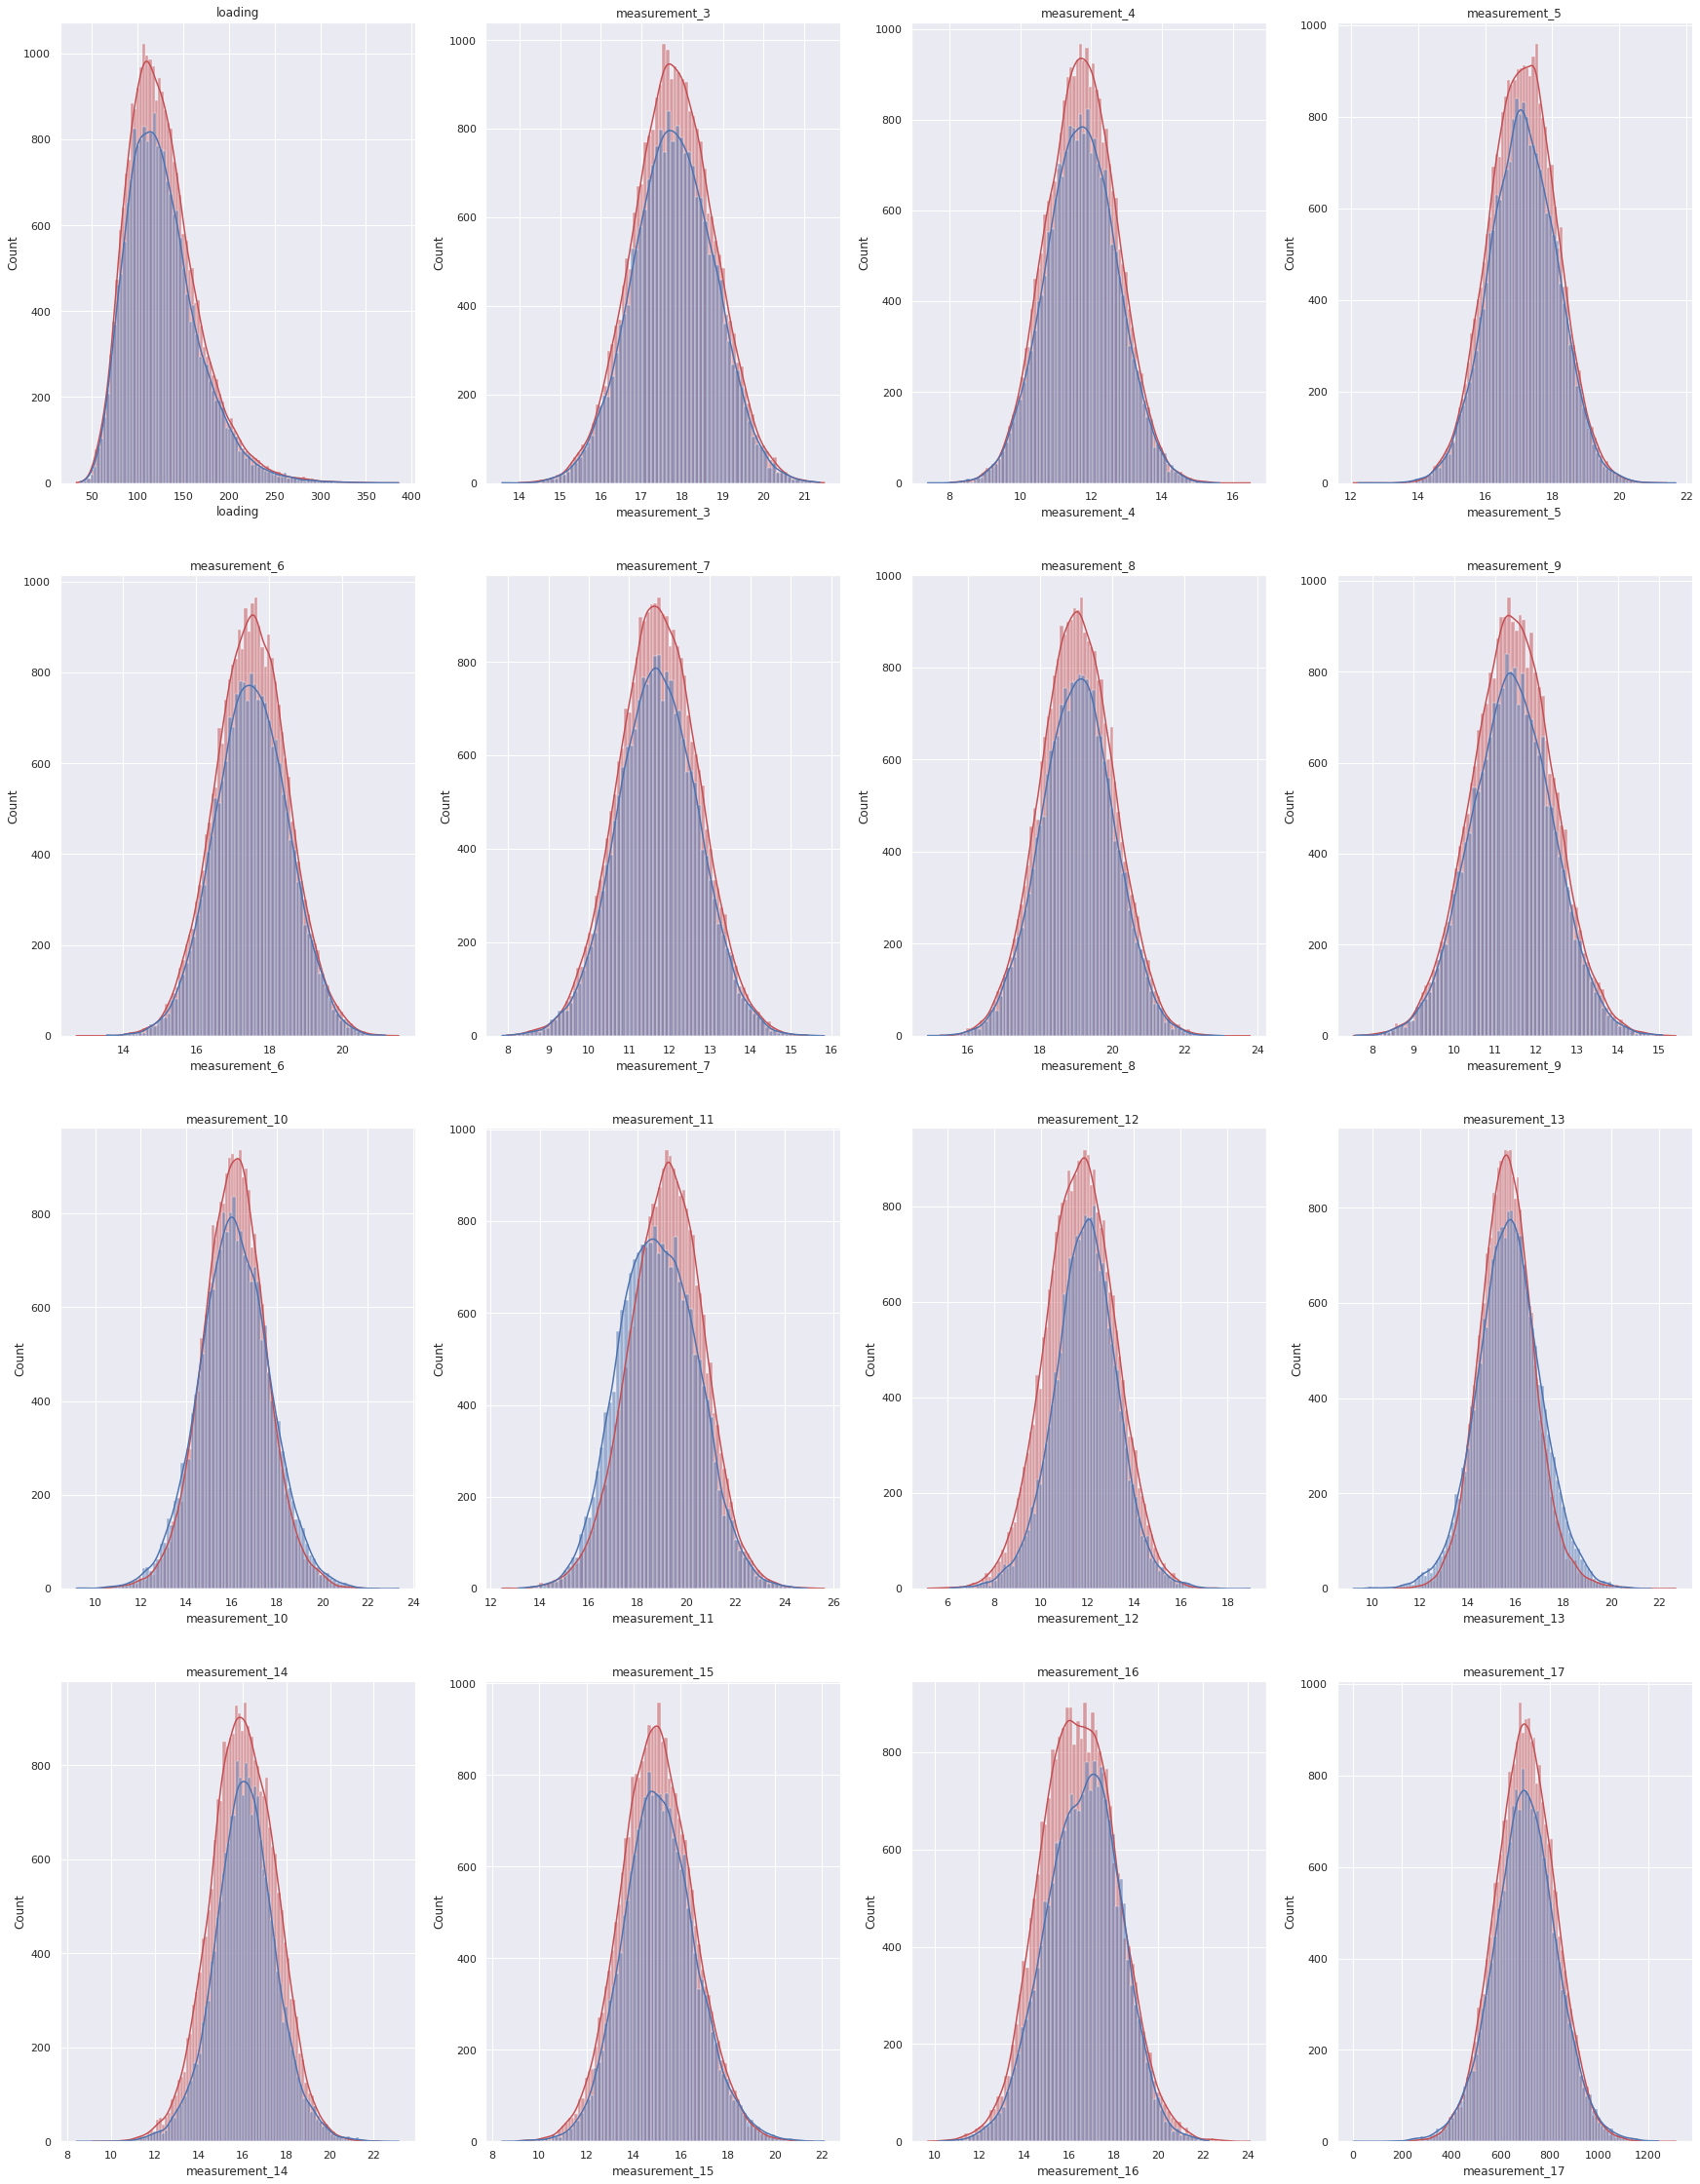

In [30]:
train_float_feat = [c for c in train.columns if train[c].dtype == 'float64']
fig, axes = plt.subplots(4, 4, figsize = (30, 40))
axe = axes.ravel()
for i, c in enumerate(train_float_feat):
    sns.histplot(train[c], ax = axe[i], color = 'r', kde = True).set(title = c)
    sns.histplot(test[c], ax = axe[i], kde = True)
plt.show()

Observations
- The distribution of train and test data for the float features are almost similar.
- Except for loading all features seems to be normally distributed.
- The training data is more peaked than the test data for the above float features.

### Plot relation between loading and failure

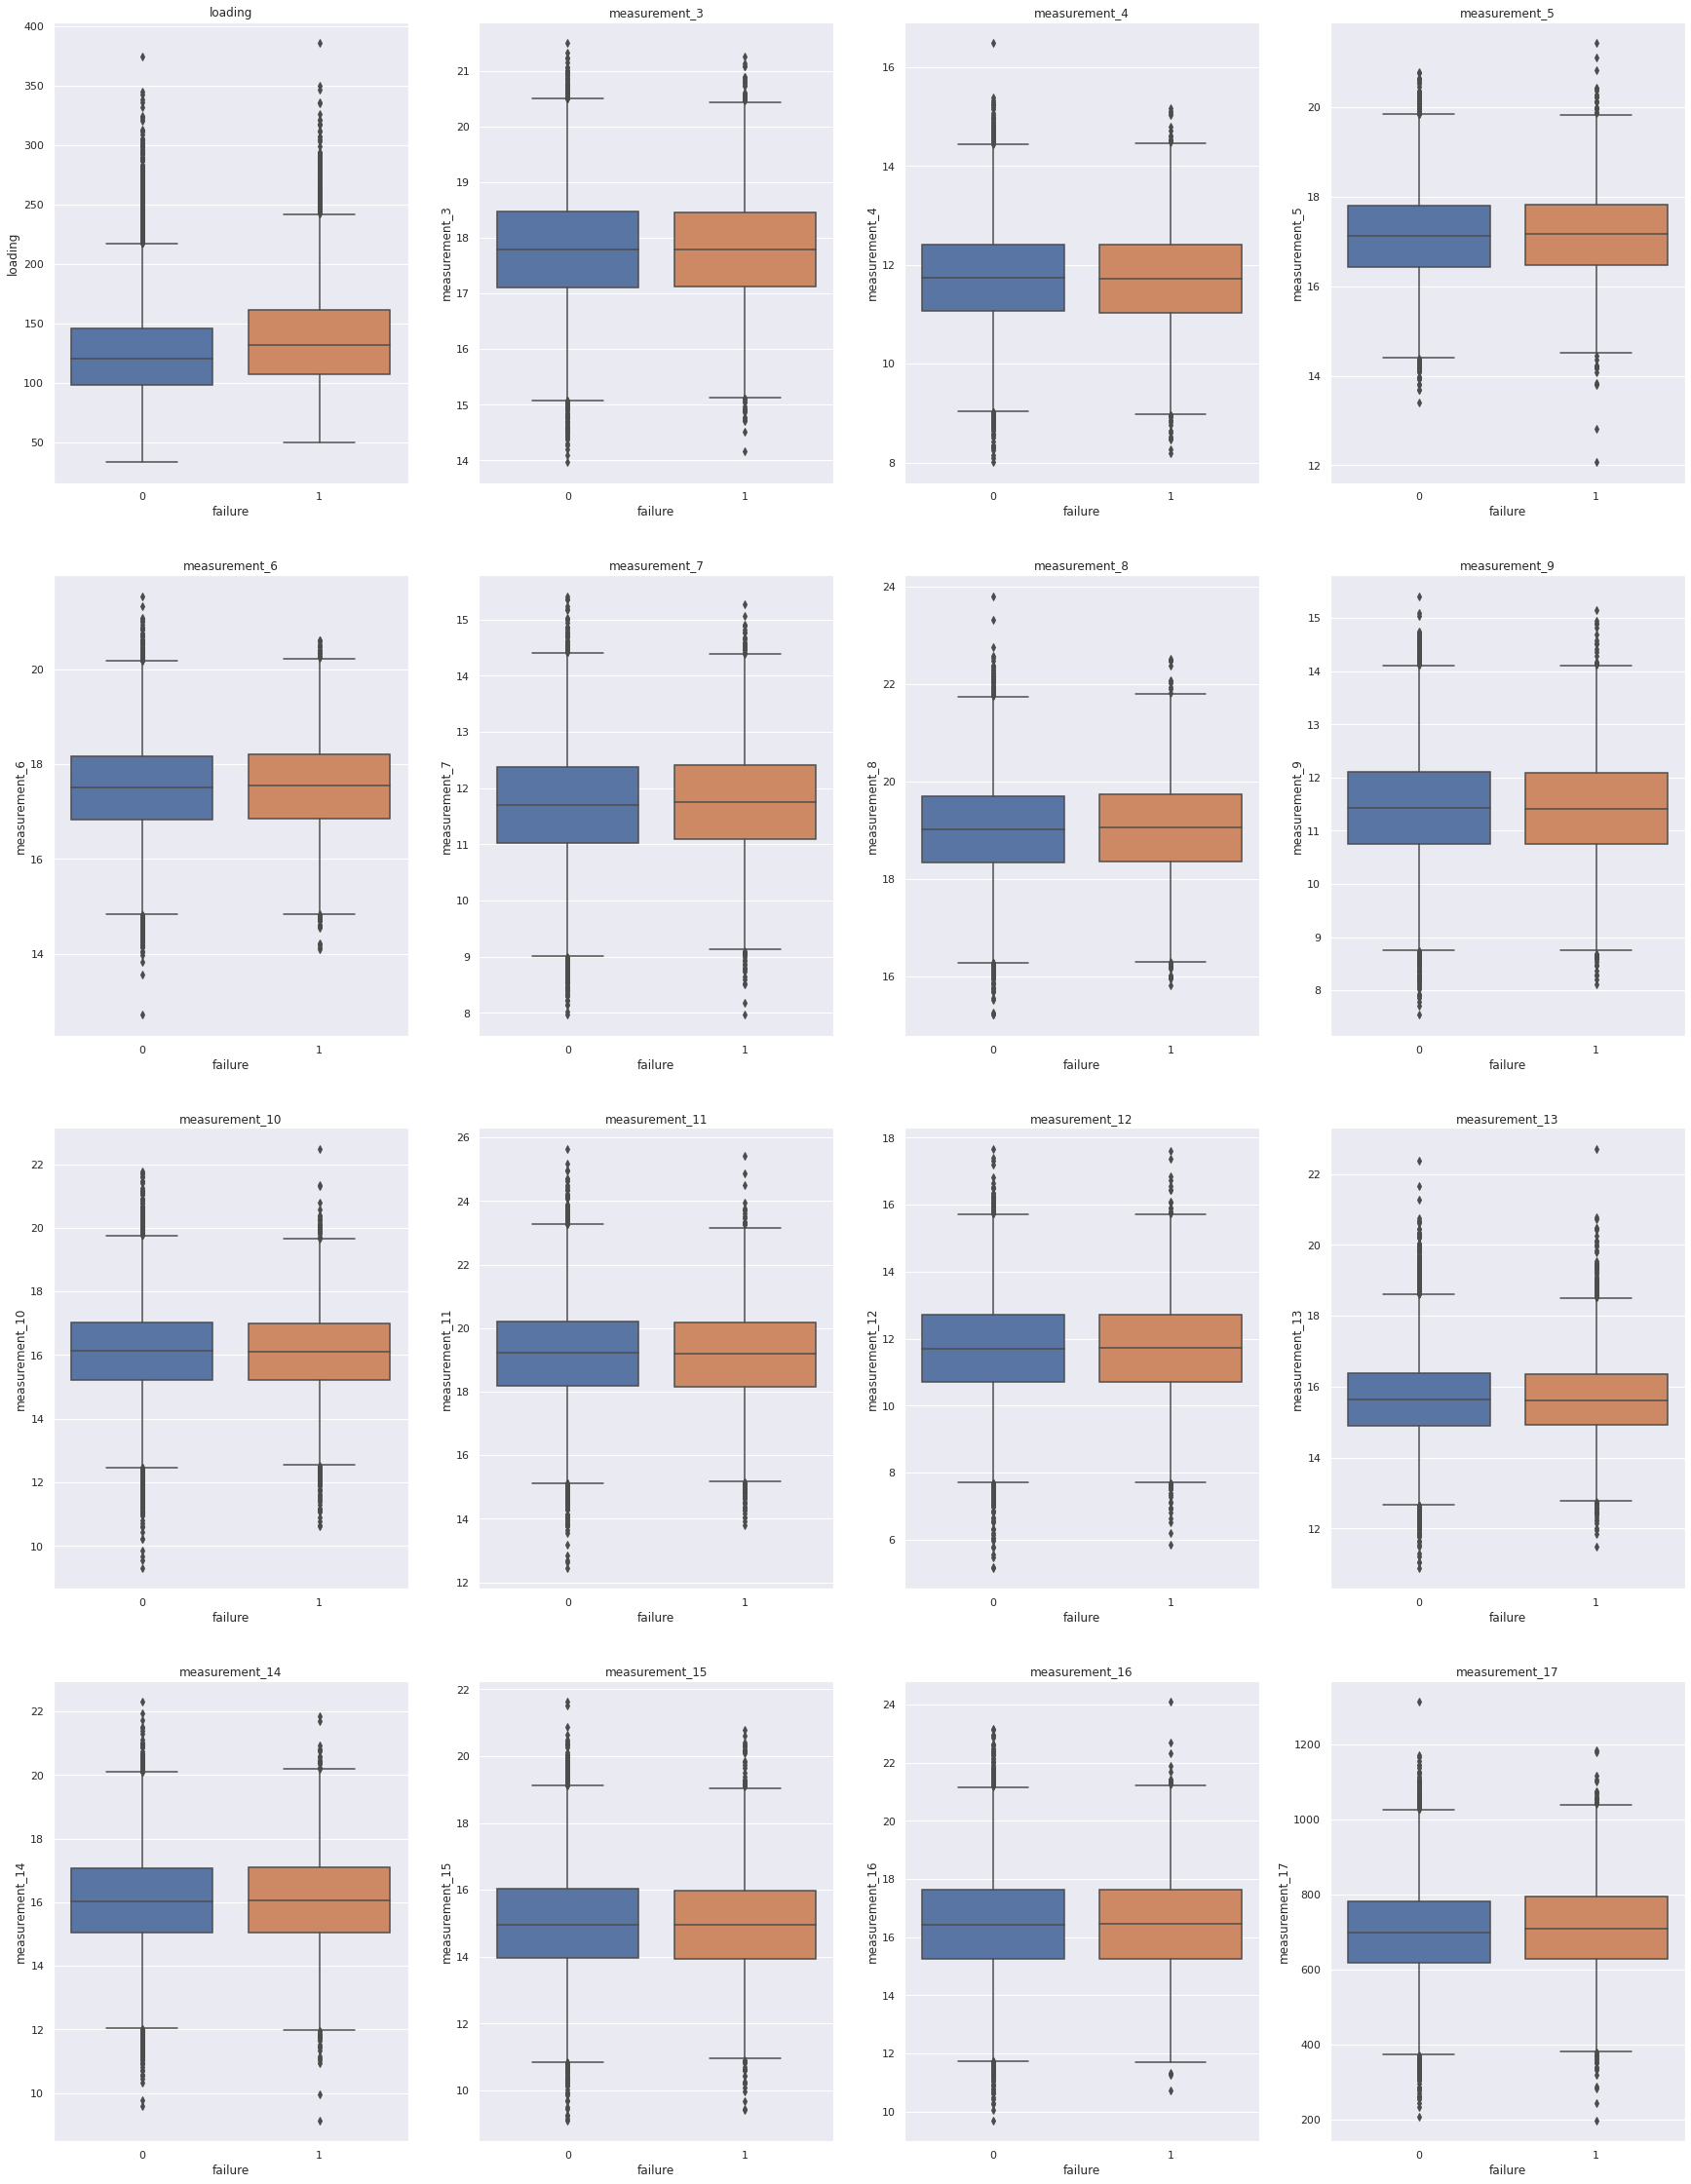

In [31]:
train_float_feat = [c for c in train.columns if train[c].dtype == 'float64']
fig, axes = plt.subplots(4, 4, figsize = (30, 40))
axe = axes.ravel()
for i, c in enumerate(train_float_feat):
    sns.boxplot(x = 'failure', y = c, data = train, ax = axe[i]).set(title = c)

- The median value of loading is higher for products failed while for the rest the median value is same for both failed and not failed
- None of the failed products have a loading value less than 50.

All the missing values are in float features, let's check if the missing values indicate any relationship with product failure.

In [32]:
import scipy.stats

Only the float features contain missing values. We will check if the missing values contain any valuable information about target variable which will help in imputing these missing values and creating new features as required.

I'll define null and alternate hypothesis to see if there is any difference in mean failure rate when values are missing and when values are not missing.

**Null Hypothesis** : Mean failure rate of missing values = Mean failure rate of values not missing

**Alternate Hypothesis** : Mean failure rate of missing values $\neq$ Mean failure rate of values not missing.

**Hence it will be a two tailed test.**

We will take level of significance, that is, the probability of making a Type 1 error to be 0.05.

**Rejection rule** : Rejection null hypothesis if p value $\le$ level of significance.

In [33]:
train_float_feat = [c for c in train.columns if train[c].dtype == 'float64']
for c in train_float_feat:
    miss_mean = train[train[c].isnull()]['failure'].mean() # mean failure rate for missing values
    not_na_mean = train[train[c].notnull()]['failure'].mean() # mean failure rate for values not missing
    miss_std = train[train[c].isnull()]['failure'].std() # standard devisation of failure for missing values
    not_na_std = train[train[c].notnull()]['failure'].std() # standard deviation of failure for values not missing
    miss_len = len(train[train[c].isnull()]['failure']) # no. of records of missing values
    not_na_len = len(train[train[c].notnull()]['failure']) # no. of records of values not missing
    # calculate z value as test statistic since standard deviation of two groups are known.
    z = (miss_mean - not_na_mean)/np.sqrt((miss_std ** 2/(miss_len)) + (not_na_std ** 2/(not_na_len)))
    p_value = scipy.stats.norm.sf(abs(z))*2 # multiply by 2 because it is a two tailed test
    details = {'mean_miss_val' : [miss_mean], 
              'mean_not_miss' : [not_na_mean], 
              'z_score' : [z], 
              'p_value': [p_value]
              }
    df = pd.DataFrame(details)
    print(c.upper() + '*' * 50)
    print(df)

LOADING**************************************************
   mean_miss_val  mean_not_miss   z_score   p_value
0          0.176       0.212956 -1.523009  0.127756
MEASUREMENT_3**************************************************
   mean_miss_val  mean_not_miss   z_score   p_value
0       0.160105       0.213372 -2.806323  0.005011
MEASUREMENT_4**************************************************
   mean_miss_val  mean_not_miss   z_score   p_value
0       0.237918       0.212085  1.392705  0.163709
MEASUREMENT_5**************************************************
   mean_miss_val  mean_not_miss   z_score   p_value
0       0.254438       0.211516  2.531485  0.011358
MEASUREMENT_6**************************************************
   mean_miss_val  mean_not_miss   z_score   p_value
0       0.214824        0.21254  0.154481  0.877231
MEASUREMENT_7**************************************************
   mean_miss_val  mean_not_miss   z_score   p_value
0       0.210245       0.212695 -0.180586  0.85669

- The difference between mean failure rate of missing values and mean failure rate of values not missing is statistically significant only for measurement_3 and measurement_5.

- So, the null hypothesis for measurement_3 and measurement_5 will be rejected while for other features we cannot reject null hypothesis.

- We will create new feature for measurement_3 and measurement_5 giving information abot values missing or not missing.

- While for other features just impute missing values.

### Checking correlation values

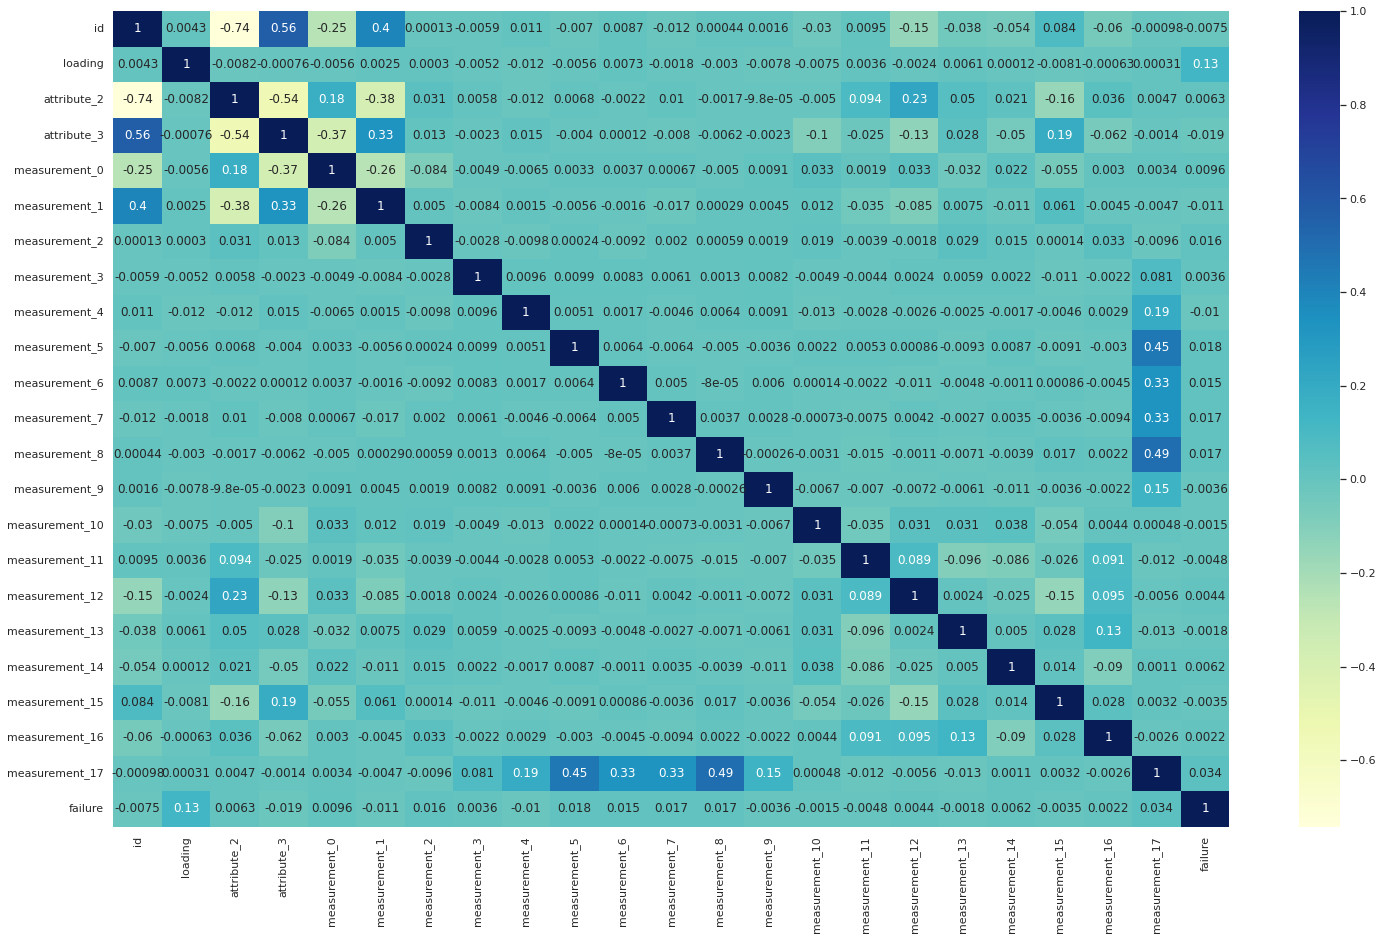

In [34]:
plt.figure(figsize = (25, 15))
train_float_feat_corr = [c for c in train.columns if train[c].dtype == 'float64' or train[c].dtype == 'int64']
float_df = train[train_float_feat_corr]
sns.heatmap(float_df.corr(), annot = True, cmap = 'YlGnBu');

# Modelling

In [58]:
from sklearn.model_selection import StratifiedKFold, KFold, GroupKFold, StratifiedGroupKFold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [36]:
Id = df_test['id']
test_df = df_test.drop('id', axis = 1)

In [91]:
# prepare data for modelling
auc_score = []
features = [c for c in df_train.columns if c not in ('id', 'failure')] 
y = df_train['failure']
train_df = df_train[features]
skf = StratifiedGroupKFold(n_splits = 5 ) 
for fold_, (trn_, val_) in enumerate(skf.split(train_df, y, train_df.product_code)):   # trn_ : train_indices      # val_ : validation_indices
    X_train = train_df.loc[trn_]
    X_val = train_df.loc[val_]
    X_test = df_test.copy()   # including test data to do all preprocessings simulataneously
    y_train = y[trn_]
    y_val = y[val_]
    # Create new features
    for data in [X_train, X_val, X_test]:
        data['measure_3_miss'] = data['measurement_3'].isnull()
        data['measure_5_miss'] = data['measurement_5'].isnull()
    # fill missing values
    features_miss_val = [c for c in df_train.columns if df_train[c].isnull().sum() > 0] # features with missing values
    knn_imputer = KNNImputer(n_neighbors = 3)
    knn_imputer.fit(df_train[features_miss_val]) # fit imputer on training data
    for data in [X_train, X_val, X_test]:
        data[features_miss_val] = knn_imputer.transform(data[features_miss_val])
    # encode categorical features
    # frequency encode product_code
    for data in [X_train, X_val, X_test]:
        #data['product_code_enc'] = data['product_code'].map(data.groupby('product_code').size()/len(data))
        # one hot encode attribute_0 and attribute_1
        data = pd.get_dummies(data, columns=['attribute_0', 'attribute_1'], drop_first = True)
    # get final train and validation without target variable
    features_final = [c for c in X_train.columns if c not in ('product_code', 'attribute_0', 'attribute_1')]
    X_train = X_train[features_final]
    X_val = X_val[features_final]
    X_test = X_test[features_final]
    # Initialize the model
    model = Pipeline([('standardscaler', StandardScaler()), ('logistic_regression',LogisticRegression(class_weight = 'balanced', random_state = 42))])
    model.fit(X_train, y_train)
    # get importance
    #importance = model.coef_[0]
    # plot feature importance
    #plt.bar([x for x in range(len(importance))], importance)
    #plt.show()
    # predict on validation data
    valid_preds = model.predict_proba(X_val)[:, 1] # use probability of 1s to get roc_auc_score
    auc = roc_auc_score(y_val, valid_preds)
    auc_score.append(auc)
    print(f'Fold = {fold_}, auc_score = {auc}')
print(f'mean auc : {sum(auc_score)/len(auc_score)}')

Fold = 0, auc_score = 0.5846465371580168
Fold = 1, auc_score = 0.5902601169064748
Fold = 2, auc_score = 0.5893414052266619
Fold = 3, auc_score = 0.5818813684647154
Fold = 4, auc_score = 0.5899948735320277
mean auc : 0.5872248602575793


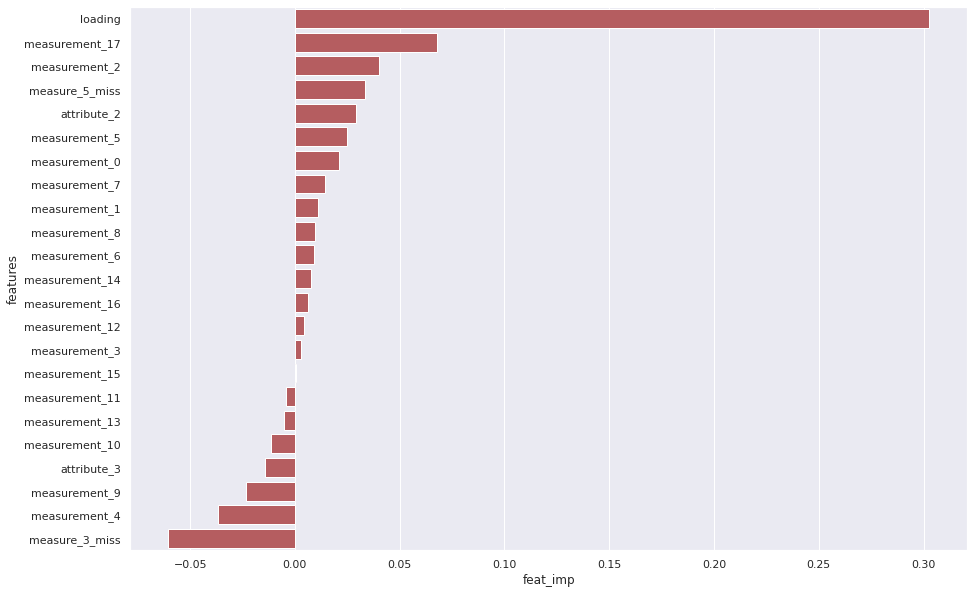

In [92]:
plt.figure(figsize = (15, 10))
imp_lst = []
importance = model.named_steps['logistic_regression'].coef_.ravel()
imp_lst.append(importance)
imp_df = pd.DataFrame(np.array(imp_lst).T, index = features_final).reset_index(drop = False)
imp_df = imp_df.rename(columns = {'index' : 'features', 0 : 'feat_imp'})
sns.barplot(x = 'feat_imp', y = 'features', data = imp_df, color = 'r', order = imp_df.sort_values('feat_imp', ascending = False).features);

In [93]:
y_test_non_bal = model.predict_proba(X_test)[:, 1]

In [94]:
submission = pd.DataFrame({'id': Id, 'failure': y_test_non_bal})
submission.to_csv('submission_final.csv', index=False)
submission.head()

,id,failure
0,26570,0.500624
1,26571,0.424799
2,26572,0.466238
3,26573,0.458829
4,26574,0.674530
